# Problema de flujo máximo.
### Autor: Saúl Sosa Díaz

En este cuaderno Jupyter, nos sumergiremos en el fascinante mundo del [Problema de Flujo Máximo](https://es.wikipedia.org/wiki/Red_de_flujo), brindando una explicación detallada y presentando un modelo matemático para su resolución. Además, exploraremos la aplicación práctica de este problema, planteando un escenario hipotético que simula una situación que podríamos enfrentar en la vida cotidiana.

---
## El Problema.

Según González Salazar, J.J. (2001, p. 297) en su libro 'Programación matemática' define el problema de flujo máximo como: 
_El problema del flujo máximo es el que aparece cuando tenemos una red de comunicaciones y deseamos enviar la mayor cantidad de producto desde un punto "fuente" a otro punto "sumidero" utilizando las conexiones de dicha red, pero sin exceder ciertos límites de tráfico que tienen tales conexiones._

Por ello, un flujo _s-t_ en un grafo G = (V,A) se describe como una función X de valores reales que asigna lo que llevará cada arco del grafo, un valor que cumple con las siguientes condiciones:

* **La conservación del flujo**: En el sistema, el flujo no se crea ni se destruye. Esto significa que todo lo que entra en un nodo que no sea _s_ (fuente) o _t_ (sumidero) debe ser igual a lo que sale de dicho nodo. Por otro lado, cuando el nodo es la fuente, la función asigna su propio valor al flujo, ya que está ingresando al sistema. De manera similar, cuando se trata del sumidero, que representa una salida del sistema, se le asigna un valor de flujo negativo.

$$
    \begin{array}{ccc}
    & \sum_{ a∈δ⁺(i)} X_a - \sum_{ a∈δ⁻(i)} X_a = 0 & i \in V \setminus \{ s, t \} \  & \\
    & \sum_{ a∈δ⁺(i)} X_a - \sum_{ a∈δ⁻(i)} X_a = Z & i = s\\
    & \sum_{ a∈δ⁺(i)} X_a - \sum_{ a∈δ⁻(i)} X_a = -Z & i = t\\
    \end{array}
$$

* **Restricciones de capacidad**: Lo que lleve cada arco no debe ser superior de la capacidad máxima que puede llevar.

$$
    \begin{array}{ccc}
    & 0\leq X_a \leq K_a & \forall a ∈ A
    \end{array}
$$

* **Un flujo _s-t_ es máximo si no existe otro flujo _s-t_ con mayor capacidad.**



## Supuesto.
Para abordar ejemplificar este problema vamos a vivir el siguiente supuesto.

Un día, ingresó a nuestras oficinas el Sr. Ayoze Hernández Díaz, quien ocupa la posición de coordinador y directivo en la empresa "Aguas de Tenerife". Su visita estaba motivada por una preocupante situación que enfrentaban en ese momento: la balsa principal de La Orotava se encontraba en un estado prácticamente vacío, lo cual generaba inquietud entre los agricultores locales, quienes, a causa de la escasez de agua, estaban expresando su descontento y exigiendo respuestas.

El Sr. Hernández Díaz nos informó que, en contraposición, la balsa de Santa Cruz de Tenerife disponía de un excedente considerable de agua, y la intención era trasladar la mayor cantidad posible de este recurso hacia la balsa de La Orotava. Sin embargo, se presentaba un desafío crucial: las tuberías que conectaban estas balsas tenían una capacidad máxima de transporte. Superar esta capacidad implicaría el riesgo de dañar las tuberías, lo que debía evitarse a toda costa.

Además, el Sr. Hernández Díaz nos explicó que, para llegar a la balsa de La Orotava desde Santa Cruz de Tenerife, era necesario atravesar una serie de balsas intermedias. Nos proporcionó un mapa detallado en el que se mostraban claramente estas balsas intermedias y las conexiones de tuberías entre ellas. Esta información era esencial para comprender la complejidad de la situación y evaluar las posibles soluciones.

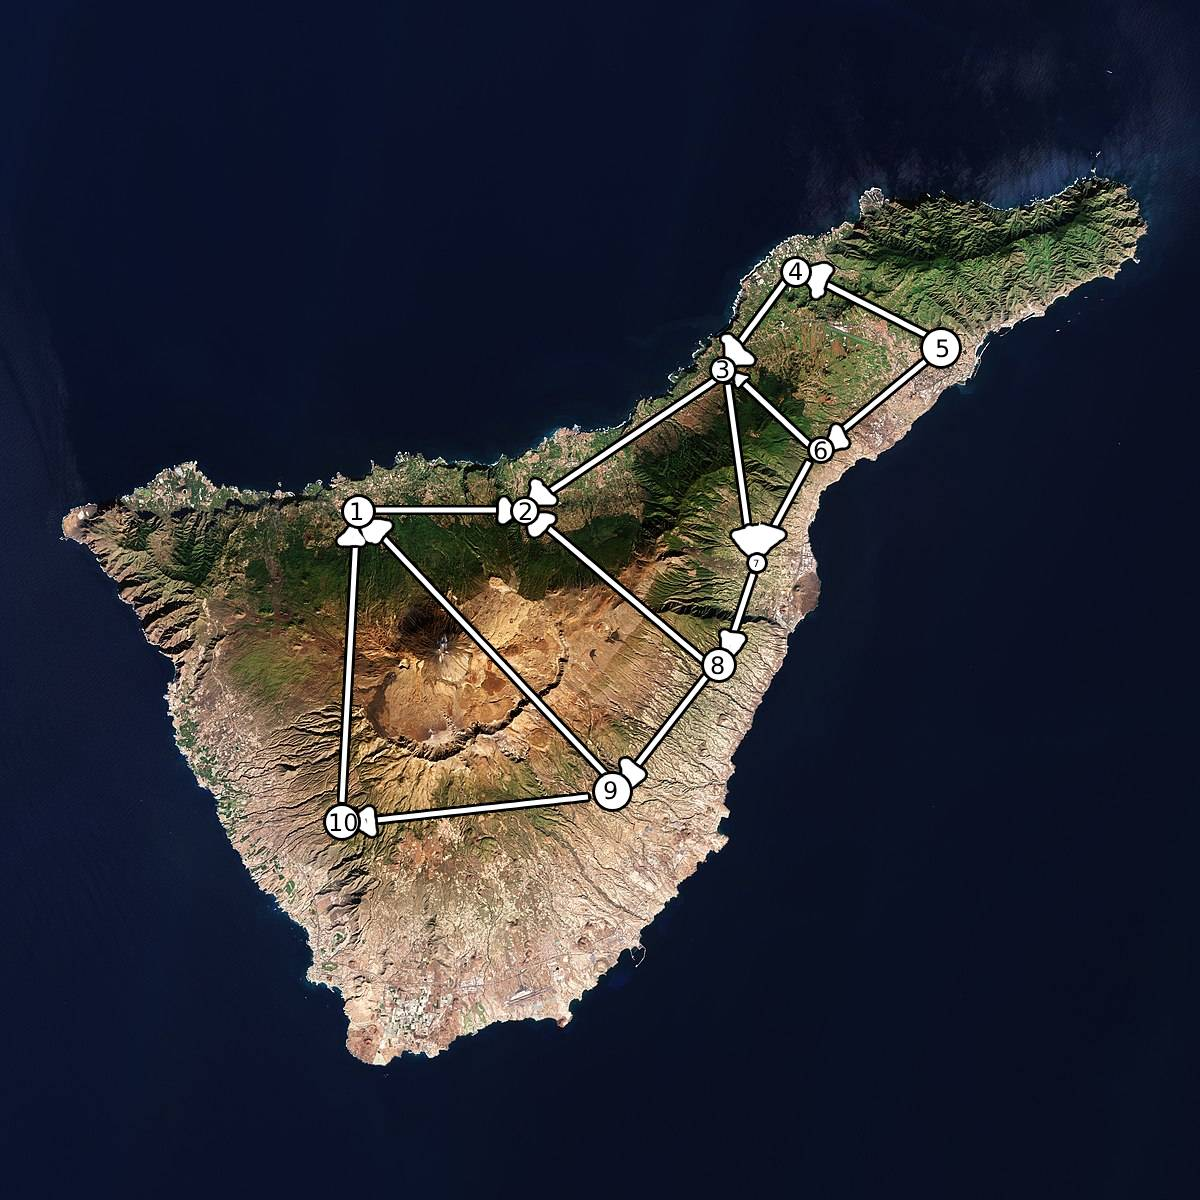

En el mapa se adjuntaba la siguiente leyenda:
| Balsa Origen | Balsa Destino | Caudal Máximo en l/m |
|--------------|---------------|----------------------|
| 1            | 2             | 84                   |
| 10           | 1             | 70                   |
| 9            | 10            | 80                   |
| 9            | 1             | 76                   |
| 8            | 9             | 78                   |
| 8            | 2             | 87                   |
| 7            | 8             | 53                   |
| 3            | 7             | 119                  |
| 6            | 7             | 68                   |
| 6            | 3             | 99                   |
| 3            | 2             | 94                   |
| 4            | 3             | 65                   |
| 5            | 4             | 112                  |
| 5            | 6             | 119                  |


### Datos.
Tenemos un conjunto de nodos que corresponden a balsas, al conjunto lo llamaremos $V = \{1,\ldots,n\}$.

En este contexto, nuestro punto de origen, o nodo fuente, se identifica como la balsa de Santa Cruz, que corresponde al nodo 5 en nuestra representación. Por otro lado, el destino final, o nodo sumidero, se encuentra en la balsa de La Orotava, correspondiente al nodo 2 en nuestra estructura.



Cómo tenemos la información del mapa podemos crear una matriz $C_{ij}$. Donde cada posición indique la capacidad máxima de la tubería que conecta la balsa $_i$ con la balsa $_j$. $\forall i,j ∈ V$ .


### Modelo.
#### Variables.
* $Z$ = Flujo que entrará al sistema.
* $X_{ij}$ = Cuanto irá de la balsa $_i$ a la balsa $_j$.
#### Función Objetivo.
$$
\begin{array}{ccc}
max & Z 
\end{array}
$$
#### Restricciones.
$$
\begin{array}{ccc}
&  \sum_{j∈V} X_{sj} = Z & \\
&  \sum_{i∈V} X_{it} = Z & \\
&  \sum_{j∈V} X_{ij} - \sum_{j∈V} X_{ji} = 0 & i \in V \setminus \{ s, t \} \\\\
&  0\leq X_{ij} \leq C_{uj} & \forall i,j ∈ V \\
\end{array}
$$

La restricción tiene como objetivo expresar la idea fundamental de que la cantidad que sale de un nodo debe ser igual a la cantidad que llega a otro nodo. Por esta razón, los índices están modificados, excepto para los nodos _s_ y _t_.

## Resolución del problema.
Importamos los paquetes necesarios.

In [1]:
import Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")
Pkg.add("GraphRecipes")
Pkg.add("Plots")

using GraphRecipes, Plots, Graphs
using JuMP, GLPK, Random, Test, LinearAlgebra


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


### Introducimos los datos.

In [2]:
C = [0 84 0 0 0 0 0 0 0 0;
     0 0 0 0 0 0 0 0 0 0;
     0 94 0 0 0 0 119 0 0 0;
     0 0 65 0 0 0 0 0 0 0;
     0 0 0 112 0 119 0 0 0 0;
     0 0 99 0 0 0 119 0 0 0;
     0 0 0 0 0 0 0 53 0 0;
     0 87 0 0 0 0 0 0 78 0;
     76 0 0 0 0 0 0 0 0 80;
     70 0 0 0 0 0 0 0 0 0
     ]
     
s = 5
t = 2
n=size(C,1)

10

Comprobamos que el grafo corresponde con el mapa de Tenerife.

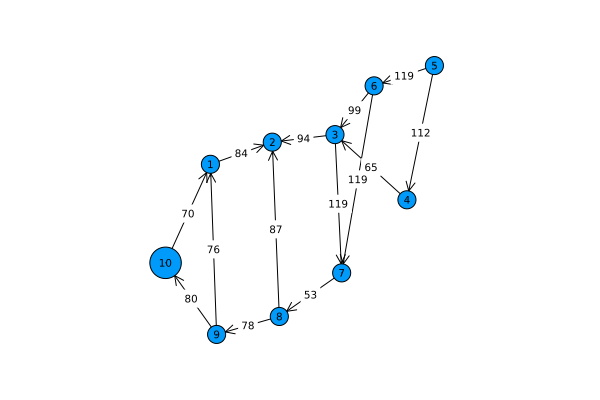

In [3]:
function graph(C)
    edgelabel_dict = Dict()
    edgelabel_mat = Array{String}(undef, n, n)
    for i in 1:n
        for j in 1:n
            edgelabel_mat[i, j] = edgelabel_dict[(i, j)] = string(C[i, j])
        end
    end
    edgelabel_vec = edgelabel_mat[:]
    graphplot(C, names=1:n, edgelabel=edgelabel_dict, curvature_scalar=0, nodeshape=:circle,  nodesize=0.2)
end

graph(C)

Vemos que el grafo corresponde con el mapa proporcionado por el cliente.
### Construir el modelo.

In [18]:

model = Model(GLPK.Optimizer)
set_silent(model)

# Definir variables
@variable(model, x[1:n,1:n] >= 0, Int)
@variable(model, Z >= 0, Int)

# Definir función objetivo
@objective(model, Max, Z)

# Definir restricciones
for i in 1:n
        for j in 1:n
                if C[i, j] > 0
                        @constraint(model, x[i, j] <= C[i, j])
                else
                        @constraint(model, x[i, j] == 0)
                end
        end
end
@constraint(model, g,  sum(x[s,:]) == Z)
@constraint(model, h,  sum(x[:,t]) == Z)

indices_a_omitir = [t, s]
for i in 1:n
        if i ∉ indices_a_omitir 
                @constraint(model, sum(x[i, :]) == sum(x[:, i]))
        end
end


Mostramos el modelo.

In [19]:
print(model)

Max Z
Subject to
 x[1,1] = 0
 x[1,3] = 0
 x[1,4] = 0
 x[1,5] = 0
 x[1,6] = 0
 x[1,7] = 0
 x[1,8] = 0
 x[1,9] = 0
 x[1,10] = 0
 x[2,1] = 0
 x[2,2] = 0
 x[2,3] = 0
 x[2,4] = 0
 x[2,5] = 0
 x[2,6] = 0
 x[2,7] = 0
 x[2,8] = 0
 x[2,9] = 0
 x[2,10] = 0
 x[3,1] = 0
 x[3,3] = 0
 x[3,4] = 0
 x[3,5] = 0
 x[3,6] = 0
 x[3,8] = 0
 x[3,9] = 0
 x[3,10] = 0
 x[4,1] = 0
 x[4,2] = 0
 x[4,4] = 0
 x[4,5] = 0
 x[4,6] = 0
 x[4,7] = 0
 x[4,8] = 0
 x[4,9] = 0
 x[4,10] = 0
 x[5,1] = 0
 x[5,2] = 0
 x[5,3] = 0
 x[5,5] = 0
 x[5,7] = 0
 x[5,8] = 0
 x[5,9] = 0
 x[5,10] = 0
 x[6,1] = 0
 x[6,2] = 0
 x[6,4] = 0
 x[6,5] = 0
 x[6,6] = 0
 x[6,8] = 0
 x[6,9] = 0
 x[6,10] = 0
 x[7,1] = 0
 x[7,2] = 0
 x[7,3] = 0
 x[7,4] = 0
 x[7,5] = 0
 x[7,6] = 0
 x[7,7] = 0
 x[7,9] = 0
 x[7,10] = 0
 x[8,1] = 0
 x[8,3] = 0
 x[8,4] = 0
 x[8,5] = 0
 x[8,6] = 0
 x[8,7] = 0
 x[8,8] = 0
 x[8,10] = 0
 x[9,2] = 0
 x[9,3] = 0
 x[9,4] = 0
 x[9,5] = 0
 x[9,6] = 0
 x[9,7] = 0
 x[9,8] = 0
 x[9,9] = 0
 x[10,2] = 0
 x[10,3] = 0
 x[10,4] = 0
 x[10,5] = 0

### Resolvemos el modelo.

In [20]:
optimize!(model)

Mostramos el resultado

In [21]:
println("Flujo máximo: ", value(Z))
println()

println("Flujos en las tuberías:")

for i in 1:n
    println("  Balsa $i")
    for j in 1:n
        if value(x[i, j]) > 0
            println("    Tubería de $i->$j: ", value(x[i, j]))
        end
    end
end


Flujo máximo: 147.0

Flujos en las tuberías:


  Balsa 1
  Balsa 2
  Balsa 3
    Tubería de 3->2: 94.0
  Balsa 4
    Tubería de 4->3: 65.0
  Balsa 5
    Tubería de 5->4: 65.0
    Tubería de 5->6: 82.0
  Balsa 6
    Tubería de 6->3: 29.0
    Tubería de 6->7: 53.0
  Balsa 7
    Tubería de 7->8: 53.0
  Balsa 8
    Tubería de 8->2: 53.0
  Balsa 9
  Balsa 10


Generando datos aleatorios

## Ahora crearemos un problema más pequeño con valores aleatorios para comprobar el correcto modelizado del problema de flujo máximo. 

s = 1
t = 5


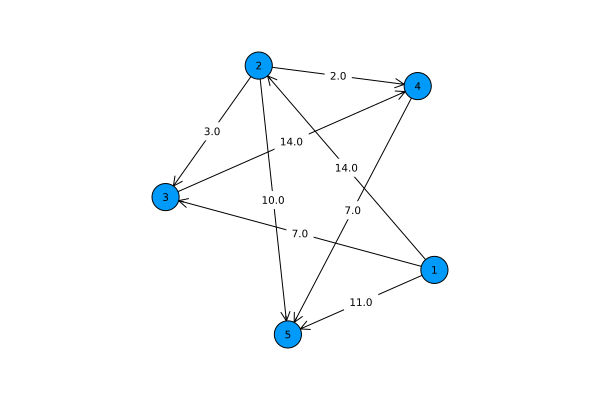

In [22]:

n=5 # número de nodos
Random.seed!(777)   

C = zeros(n, n) # Matriz de capacidades de los arcos
for i in 1:n
    for j in i:n
        if i != j
            C[i, j] = rand(0:15)
        end
    end
end

s = 1 # Nodo fuente
t = n


println("s = ", s)
println("t = ", t)
graph(C)




In [23]:
model = Model(GLPK.Optimizer)
set_silent(model)

# Definir variables
@variable(model, x[1:n,1:n] >= 0, Int)
@variable(model, Z >= 0, Int)

# Definir función objetivo
@objective(model, Max, Z)

# Definir restricciones
for i in 1:n
        for j in 1:n
                if C[i, j] > 0
                        @constraint(model, x[i, j] <= C[i, j])
                else
                        @constraint(model, x[i, j] == 0)
                end
        end
end
@constraint(model, g,  sum(x[s,:]) == Z)
@constraint(model, h,  sum(x[:,t]) == Z)

indices_a_omitir = [t, s]
for i in 1:n
        if i ∉ indices_a_omitir 
                @constraint(model, sum(x[i, :]) == sum(x[:, i]))
    end
end

optimize!(model)

In [26]:

println("Flujo maximo:", value(Z))
println()

println("Flujos en los arcos:")

for i in 1:n
    println("  Nodo $i")
    for j in 1:n
        if value(x[i, j]) > 0
            println("    Flujo de $i->$j: ", value(x[i, j]))
        end
    end
end

Flujo maximo:28.0

Flujos en los arcos:
  Nodo 1
    Flujo de 1->2: 12.0
    Flujo de 1->3: 5.0
    Flujo de 1->5: 11.0
  Nodo 2
    Flujo de 2->4: 2.0
    Flujo de 2->5: 10.0
  Nodo 3
    Flujo de 3->4: 5.0
  Nodo 4
    Flujo de 4->5: 7.0
  Nodo 5


Podemos comprobar con este pequeño ejemplo que el problema está correctamente modelizado.

## Bibliografía:
* Salazar González,J.J. (2001). Programación matemática.